In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [27]:
from scipy.stats import zscore
import datetime

In [39]:
campData=pd.read_csv('campaign_data.csv')

In [40]:
campData.head()
campData.isnull().sum()

campaign_id      0
campaign_type    0
start_date       0
end_date         0
dtype: int64

In [41]:
campData.head()

,campaign_id,campaign_type,start_date,end_date
0,24,Y,21/10/13,20/12/13
1,25,Y,21/10/13,22/11/13
2,20,Y,07/09/13,16/11/13
3,23,Y,08/10/13,15/11/13
4,21,Y,16/09/13,18/10/13


In [42]:
campData['campaign_type'].value_counts()

Y    22
X     6
Name: campaign_type, dtype: int64

In [43]:
campData['campaign_type'].replace({'X':0.21,'Y':0.78},inplace=True)

In [44]:
campData['start_date']=campData['start_date'].astype('datetime64[ns]')
campData['end_date']=campData['end_date'].astype('datetime64[ns]')

In [55]:
campData.dtypes

campaign_id                int64
campaign_type            float64
start_date        datetime64[ns]
end_date          datetime64[ns]
no_of_days       timedelta64[ns]
dtype: object

In [53]:
campData['no_of_days']=campData['end_date']-campData['start_date']

In [59]:
campData.head()

,campaign_id,campaign_type,start_date,end_date,no_of_days
0,24,0.78,2013-10-21,2013-12-20,60
1,25,0.78,2013-10-21,2013-11-22,32
2,20,0.78,2013-07-09,2013-11-16,130
3,23,0.78,2013-08-10,2013-11-15,97
4,21,0.78,2013-09-16,2013-10-18,32


In [56]:
campData['no_of_days']=campData['no_of_days'].apply(lambda x:str(x))

In [63]:
campData['no_of_days']=campData['no_of_days'].apply(lambda x:str(x).replace(' days 00:00:00',''))
campData['no_of_days']=campData['no_of_days'].apply(lambda x:str(x).replace(' days +00:00:00',''))
campData['no_of_days']=campData['no_of_days'].apply(lambda x:str(x).replace('-',''))

In [64]:
campData['no_of_days'].value_counts()

32     9
77     1
182    1
37     1
31     1
78     1
56     1
75     1
289    1
181    1
62     1
60     1
61     1
25     1
133    1
130    1
12     1
112    1
97     1
63     1
Name: no_of_days, dtype: int64

In [65]:
campData['no_of_days']=campData['no_of_days'].astype('int')

In [69]:
campData.drop(columns=['start_date', 'end_date'],inplace=True)

In [70]:
campData.set_index('campaign_id',inplace=True)

In [71]:
campData.head()

,campaign_type,no_of_days
campaign_id,,
24,0.78,60
25,0.78,32
20,0.78,130
23,0.78,97
21,0.78,32


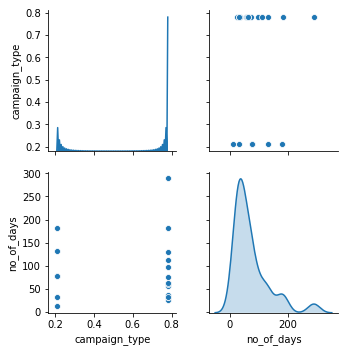

In [74]:
sns.pairplot(campData,diag_kind='kde')

In [76]:
campData_scaled=campData.apply(zscore)

In [78]:
cluster_range = range( 1, 10 )
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 10 )
  clusters.fit(campData_scaled)
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:10]

,num_clusters,cluster_errors
0,1,56.000000
1,2,27.688555
2,3,11.465017
3,4,7.344929
4,5,3.381399
5,6,2.359326
6,7,1.412991
7,8,0.585508
8,9,0.276033


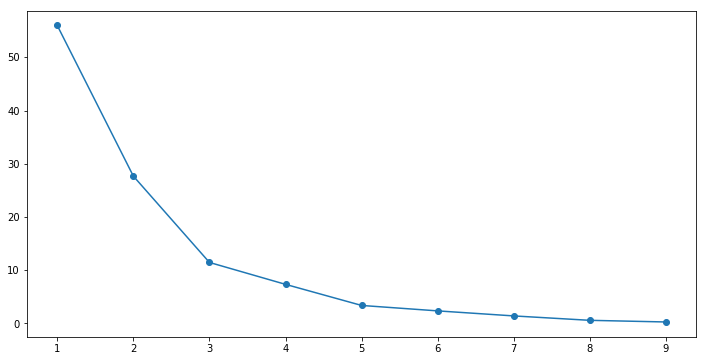

In [79]:
# Elbow plot
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [80]:
kmeans = KMeans(n_clusters=3, n_init = 15, random_state=2345)

In [81]:
kmeans.fit(campData_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=15, n_jobs=None, precompute_distances='auto',
    random_state=2345, tol=0.0001, verbose=0)

In [83]:
centroids = kmeans.cluster_centers_
centroids

array([[ 0.52223297, -0.32663503],
       [-1.91485422,  0.20195177],
       [ 0.52223297,  2.660495  ]])

In [85]:
centroid_df = pd.DataFrame(centroids, columns = list(campData_scaled) )
centroid_df

,campaign_type,no_of_days
0,0.522233,-0.326635
1,-1.914854,0.201952
2,0.522233,2.660495


In [88]:
campData['label']=kmeans.labels_
campData['label'].value_counts()

0    20
1     6
2     2
Name: label, dtype: int64

In [91]:
campData.reset_index(inplace=True)

In [92]:
campData.head()

,campaign_id,campaign_type,no_of_days,label
0,24,0.78,60,0
1,25,0.78,32,0
2,20,0.78,130,0
3,23,0.78,97,0
4,21,0.78,32,0


In [94]:
campData.to_csv('campData.csv')